## 1.평균변화율
특정한 구간 내에서 독립 변수의 값이 변화함에 따른 함수값의 변화를 계산하는 것이다.

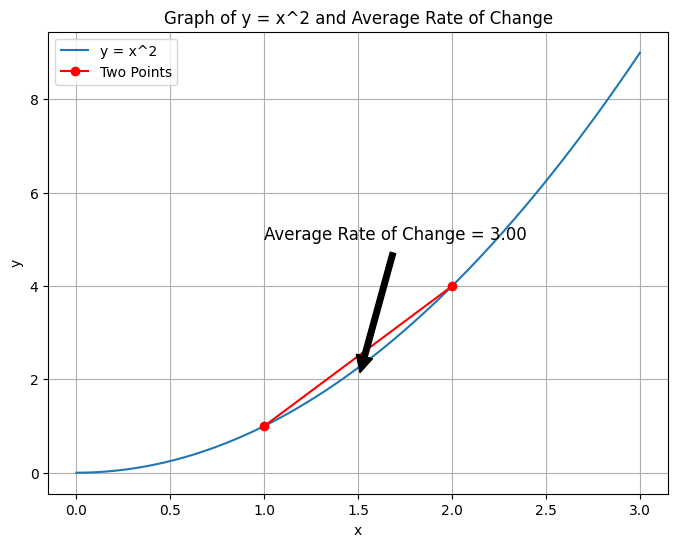

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 함수
def f(x):
    return x ** 2

# x1, x2 값 설정
x1 = 1
x2 = 2
y1 = f(x1)
y2 = f(x2)

# 평균변화율 계산
average_rate_of_change = (y2 - y1) / (x2 - x1)

# 그래프 생성
plt.figure(figsize=(8, 6))

# 함수값과 평균변화율 표시
x_range = np.linspace(0, 3, 400)
plt.plot(x_range, f(x_range), label=f'y = x^2')
plt.plot([x1, x2], [y1, y2], marker='o', color='red', label='Two Points')
plt.annotate(f'Average Rate of Change = {average_rate_of_change:.2f}', xy=(1.5, 2), xytext=(1, 5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# 그래프 레이블 및 타이틀 설정
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = x^2 and Average Rate of Change')
plt.legend()

# 그래프 보이기
plt.grid(True)
plt.show()


## 2.순간변화율
평균변화율에서 정했던 구간 $x_1$과 $x_2$ 간 거리를 0에 가까울정도로 좁혔을 때(즉 x에 아주아주 작은 변화가 적용되었을 때)의 함수값의 변화를 측정하는 것이다.  
이를 그래프로 나타내보면 함수 $f(x) = x^2$에서 x의 접선의 기울기를 구할 수 있게 된다. 또한 이 접선의 기울기를 통해 trainable-parameter들을 갱신하는 방향을 정할 수 있다.

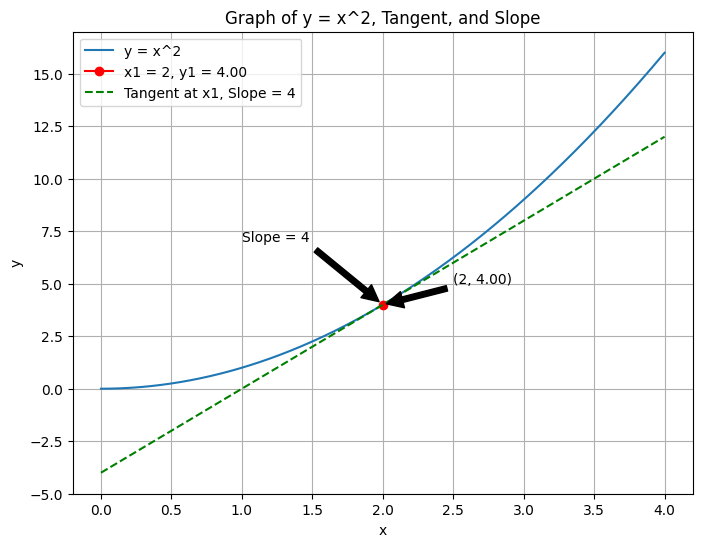

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 함수
def f(x):
    return x ** 2

# x 값 설정
x1 = 2
y1 = f(x1)
derivative_at_x1 = 2 * x1  # 순간변화율 (미분) 계산

# 접선의 기울기 계산
slope_at_x1 = derivative_at_x1

# 그래프 생성
x_range = np.linspace(0, 4, 400)
y_range = f(x_range)

plt.figure(figsize=(8, 6))

# 함수값과 접선 표시
plt.plot(x_range, y_range, label=f'y = x^2')
plt.plot(x1, y1, marker='o', color='red', label=f'x1 = {x1}, y1 = {y1:.2f}')
plt.plot(x_range, slope_at_x1 * (x_range - x1) + y1, linestyle='--', color='green', label=f'Tangent at x1, Slope = {slope_at_x1}')
plt.annotate(f'({x1}, {y1:.2f})', xy=(x1, y1), xytext=(x1 + 0.5, y1 + 1), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
plt.annotate(f'Slope = {slope_at_x1}', xy=(x1, slope_at_x1 * (x1 - x1) + y1), xytext=(x1 - 1, slope_at_x1 * (x1 - x1) + y1 + 3), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# 그래프 레이블 및 타이틀 설정
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = x^2, Tangent, and Slope')
plt.legend()

# 그래프 보이기
plt.grid(True)
plt.show()


## 3.Multivariate function
다변수 함수는 하나의 함수가 다수의 독립변수들로 구성된 입력 데이터를 받는 형태.

In [8]:
import torch
import torch.nn as nn


## 입력 데이터 multivariables 생성
inputs = torch.tensor([[2.0, 3.0, 4.0]])  # x 값과 y 값
print(inputs.shape)

layer1 = nn.Linear(inputs.shape[1], 1)
weight_shape = layer1.weight.shape
bias_shape = layer1.bias.shape
print(weight_shape, bias_shape)


# 레이어를 통해 입력을 전달하여 출력 얻기
output = layer1(inputs)
print("Output:", output.item())


torch.Size([1, 3])
torch.Size([1, 3]) torch.Size([1])
Output: 1.5839385986328125


### 다변수 함수의 등고선

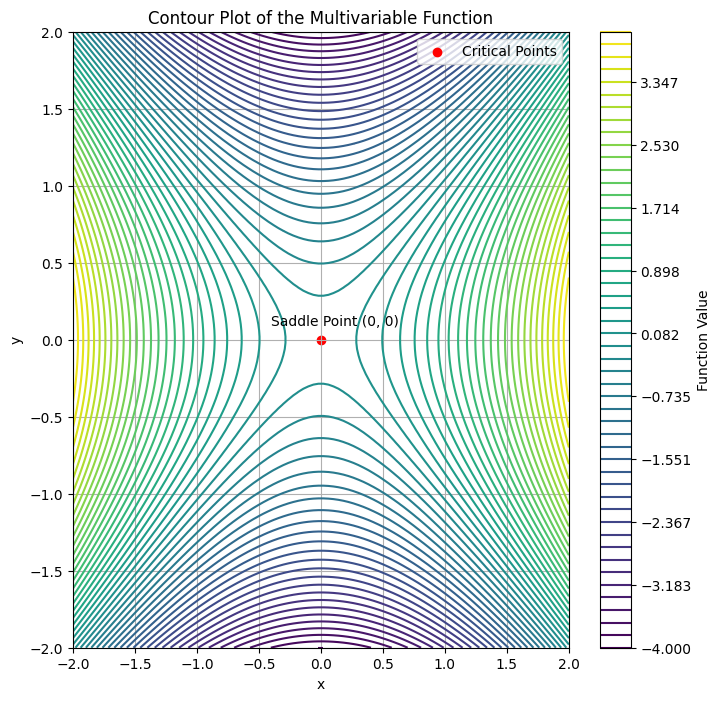

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 다변수 함수 f(x, y) = x^2 - y^2
def multivariable_function(x, y):
    return x**2 - y**2

# 변수 범위 설정
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)

# 함수 값 계산
Z = multivariable_function(X, Y)

# 그래프 그리기
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of the Multivariable Function')

# 극대점, 극소점, 안장점 표시
critical_points = [(0, 0)]  # 함수의 임계점
plt.scatter(*zip(*critical_points), color='red', marker='o', label='Critical Points')
plt.annotate('Saddle Point (0, 0)', (0, 0), textcoords="offset points", xytext=(10,10), ha='center', fontsize=10)

plt.legend()
plt.grid(True)
plt.show()


## 4.Vector Function  
벡터함수는 multivariate function과 다르게 다수의 원소함수가 공통된 입력 데이터를 받아 다차원의 출력값을 출력하는 함수.

In [13]:
import torch
import torch.nn as nn

# 입력 데이터 생성 (3차원 벡터)
input_vector = torch.tensor([1.0, 2.0, 3.0])

# 벡터 함수를 nn.Linear로 구현
class VectorFunction(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(VectorFunction, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

# 벡터 함수 인스턴스 생성
input_dim = len(input_vector)
output_dim = 2  # 출력 차원 (2차원 벡터)
vector_function = VectorFunction(input_dim, output_dim)

# weight와 bias의 shape 출력
weight_shape = vector_function.linear.weight.shape
bias_shape = vector_function.linear.bias.shape
print("Weight shape:", weight_shape)
print("Bias shape:", bias_shape)

# 입력 벡터를 통해 벡터 함수의 출력 벡터 계산
output_vector = vector_function(input_vector)
print("Output vector:", output_vector)


Weight shape: torch.Size([2, 3])
Bias shape: torch.Size([2])
Output vector: tensor([-1.8638,  0.7620], grad_fn=<AddBackward0>)
